In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Data Analysis and Data Cleaning

In [132]:
loan = pd.read_csv('loan.csv')

loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [133]:
loan.shape

(39717, 111)

In [134]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [135]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


### Remove columns
- check the mean of null values for each column
- Remove the columns which are having more than 50% null values

In [136]:
#Identify the columns which are more than 60% empty or Nan values
round(100*loan.isnull().mean(), 2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [137]:
# identify the null_columsn_percentage by using mean()
null_columns_percentage = loan.isnull().mean()
null_columns_percentage

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
                                ...   
tax_liens                     0.000982
tot_hi_cred_lim               1.000000
total_bal_ex_mort             1.000000
total_bc_limit                1.000000
total_il_high_credit_limit    1.000000
Length: 111, dtype: float64

In [138]:
#Specify the threshold for null values (e.g., 60%)
threshold= 0.6 

# Identify the columns which are more than 60%
columns_to_drop = null_columns_percentage[null_columns_percentage > threshold].index

In [139]:
columns_to_drop

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [140]:
clean_loan_data = loan.drop(columns=columns_to_drop, axis=1)

In [141]:
clean_loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [142]:
loan.shape

(39717, 111)

In [143]:
clean_loan_data.shape

(39717, 54)

#### By difference of 'loan' and 'clean_loan_data' columns (111-54 = 57)
#### Removed those 57 columns which are having more than 50% null/missing  values

In [144]:
# checking 'clean_loan_data' dataframe missing values
round(100*clean_loan_data.isnull().mean(), 2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.59
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

### Remove rows which are having less than 0% null values

In [146]:
# Now we can remove the rows which are having very low number of Nan /empty/missing values. 
# As per above data we can remove <0
# 'title' - 0.03
# 'revol_util' - 0.13
# 'last_pymnt_d' - 0.18
# 'last_credit_pull_d' - 0.01
# 'collections_12_mths_ex_med' - 0.14
# 'chargeoff_within_12_mths' - 0.14
# 'tax_liens' - 0.10
#

clean_loan_data = clean_loan_data[clean_loan_data[['title','revol_util','last_pymnt_d','last_credit_pull_d','collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens']].notna().all(axis=1)]


In [147]:
clean_loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [148]:
round(100*clean_loan_data.isnull().mean(), 2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.16
emp_length                     2.70
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.61
purpose                        0.00
title                          0.00
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [50]:
# Now we can see all below columns mean is 'zero' as we have removed the rows which are null/empty
# 'title'
# 'revol_util'
# 'last_pymnt_d'
# 'last_credit_pull_d'
# 'collections_12_mths_ex_med'
# 'chargeoff_within_12_mths'
# 'tax_liens'

### Update rows which are having less number of null/missing values with default values
- 'emp_title' missing values filling with default value 'Unknown'
- 'emp_length' missing values filling with default value 'Unknown'
- 'desc' missing values filling with defualt value 'No Description'
- 'pub_rec_bankruptcies' missing vlaues filling with 'median'

In [149]:
# 'emp_title' missing values filling with default value 'Unknown'
# 'emp_length' missing values filling with default value 'Unknown'
# 'desc' missing values filling with defualt value 'No Description'
# 'pub_rec_bankruptcies' missing vlaues filling with 'median'

clean_loan_data['emp_title'].fillna('Unknown', inplace=True)
clean_loan_data['emp_length'].fillna('Unknown', inplace=True)
clean_loan_data['desc'].fillna('No Description', inplace=True)
clean_loan_data['pub_rec_bankruptcies'].fillna(clean_loan_data['pub_rec_bankruptcies'].median(), inplace=True)

clean_loan_data[['emp_title','emp_length','desc','pub_rec_bankruptcies']].head(20)

,emp_title,emp_length,desc,pub_rec_bankruptcies
0,Unknown,10+ years,Borrower added on 12/22/11 > I need to upgra...,0.0
1,Ryder,< 1 year,Borrower added on 12/22/11 > I plan to use t...,0.0
2,Unknown,10+ years,No Description,0.0
3,AIR RESOURCES BOARD,10+ years,Borrower added on 12/21/11 > to pay for prop...,0.0
4,University Medical Group,1 year,Borrower added on 12/21/11 > I plan on combi...,0.0
5,Veolia Transportaton,3 years,No Description,0.0
6,Southern Star Photography,8 years,Borrower added on 12/18/11 > I am planning o...,0.0
7,MKC Accounting,9 years,Borrower added on 12/16/11 > Downpayment for...,0.0
8,Unknown,4 years,Borrower added on 12/21/11 > I own a small h...,0.0
9,Starbucks,< 1 year,Borrower added on 12/16/11 > I'm trying to b...,0.0


In [150]:
clean_loan_data['int_rate_num'] = clean_loan_data['int_rate'].str.extract('(\d+\.\d+|\d+)').astype(float)

In [151]:
# Add 'loan_issue_year' using 'issue_d' column
clean_loan_data['issue_d'] = pd.to_datetime(clean_loan_data['issue_d'], format='%b-%y')

clean_loan_data["loan_issued_year"] = clean_loan_data['issue_d'].dt.year


In [152]:
# Now we have the clean data with out null/empty/missing values
# See below all columns have 0% of null values.
round(100*clean_loan_data.isnull().mean(), 2)

id                            0.0
member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_title                     0.0
emp_length                    0.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
url                           0.0
desc                          0.0
purpose                       0.0
title                         0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec       

In [153]:
clean_loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,issue_d,dti,delinq_2yrs,...,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,int_rate_num,loan_issued_year
count,3.953100e+04,3.953100e+04,39531.000000,39531.000000,39531.000000,39531.000000,3.953100e+04,39531,39531.000000,39531.000000,...,39531.000000,39531.0,39531.0,39531.0,39531.0,39531.0,39531.000000,39531.0,39531.000000,39531.000000
mean,6.842084e+05,8.518542e+05,11240.396145,10967.609598,10425.339261,325.094419,6.901467e+04,2010-11-06 02:45:57.714198784,13.328431,0.146240,...,2689.651093,0.0,1.0,0.0,0.0,0.0,0.042473,0.0,12.016524,2010.334674
min,5.473400e+04,7.472400e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,2007-08-01 00:00:00,0.000000,0.000000,...,0.010000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,5.420000,2007.000000
25%,5.168850e+05,6.675740e+05,5500.000000,5437.500000,5000.000000,167.340000,4.074600e+04,2010-05-01 00:00:00,8.200000,0.000000,...,220.935000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,9.250000,2010.000000
50%,6.664430e+05,8.519340e+05,10000.000000,9750.000000,8999.448728,280.970000,5.900000e+04,2011-02-01 00:00:00,13.410000,0.000000,...,550.100000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,11.830000,2011.000000
75%,8.382700e+05,1.047818e+06,15000.000000,15000.000000,14400.000000,431.370000,8.240400e+04,2011-08-01 00:00:00,18.605000,0.000000,...,3314.315000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,14.540000,2011.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,2011-12-01 00:00:00,29.990000,11.000000,...,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0,24.590000,2011.000000
std,2.097075e+05,2.643274e+05,7456.279941,7186.580728,7125.180571,208.864216,6.383610e+04,NaN,6.674220,0.491043,...,4454.128081,0.0,0.0,0.0,0.0,0.0,0.202544,0.0,3.724772,0.868749


In [154]:
clean_loan_data.nunique()

id                            39531
member_id                     39531
loan_amnt                       884
funded_amnt                    1040
funded_amnt_inv                8192
term                              2
int_rate                        371
installment                   15315
grade                             7
sub_grade                        35
emp_title                     28693
emp_length                       12
home_ownership                    5
annual_inc                     5299
verification_status               3
issue_d                          53
loan_status                       3
pymnt_plan                        1
url                           39531
desc                          26397
purpose                          14
title                         19509
zip_code                        821
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [155]:
# added new column which extracts the only number of year value from 'emp_length'
clean_loan_data['emp_length_float'] = clean_loan_data['emp_length'].str.extract('(\d+)').astype(float)

In [156]:

clean_loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,int_rate_num,loan_issued_year,emp_length_float
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,1,INDIVIDUAL,0,0.0,0,0.0,0.0,10.65,2011,10.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1,INDIVIDUAL,0,0.0,0,0.0,0.0,15.27,2011,1.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,1,INDIVIDUAL,0,0.0,0,0.0,0.0,15.96,2011,10.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,1,INDIVIDUAL,0,0.0,0,0.0,0.0,13.49,2011,10.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,1,INDIVIDUAL,0,0.0,0,0.0,0.0,12.69,2011,1.0


## Univariate Analysis


In [157]:
# 'unnecessary_cols' which are having large number unique values, will drop these cols as well.
unnecessary_cols = ['id','member_id','url','desc','emp_title','title','revol_bal','total_pymnt','total_pymnt_inv','total_rec_int','last_pymnt_amnt']
clean_loan_data.drop(unnecessary_cols, axis=1, inplace=True)

In [158]:
clean_loan_data.shape

(39531, 46)

In [159]:
clean_loan_data.nunique()

loan_amnt                       884
funded_amnt                    1040
funded_amnt_inv                8192
term                              2
int_rate                        371
installment                   15315
grade                             7
sub_grade                        35
emp_length                       12
home_ownership                    5
annual_inc                     5299
verification_status               3
issue_d                          53
loan_status                       3
pymnt_plan                        1
purpose                          14
zip_code                        821
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                         40
pub_rec                           5
revol_util                     1089
total_acc                        82
initial_list_status               1
out_prncp                   

In [160]:
categorical_cols=['loan_status','term','grade','home_ownership','verification_status','purpose','addr_state']
num_cols = ['int_rate_num','annual_inc','funded_amnt','installment','loan_amnt']

Boxplot of  int_rate_num


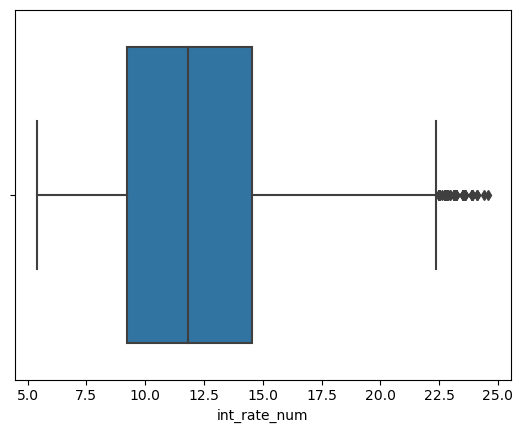

Boxplot of  annual_inc


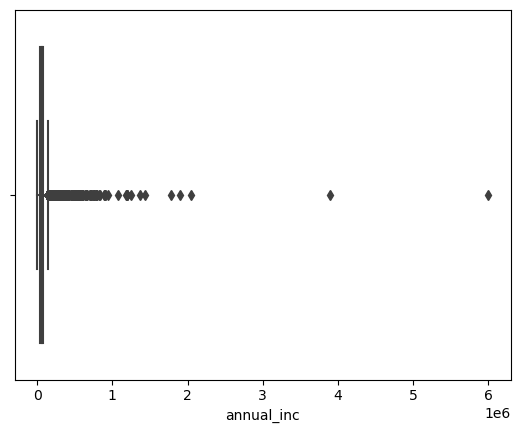

Boxplot of  funded_amnt


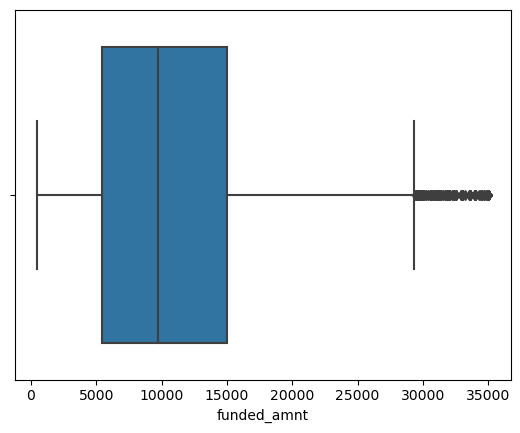

Boxplot of  installment


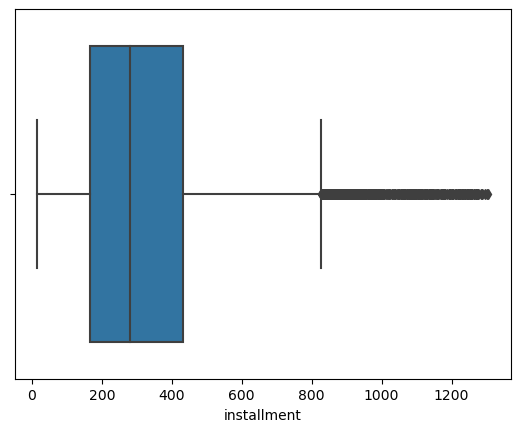

Boxplot of  loan_amnt


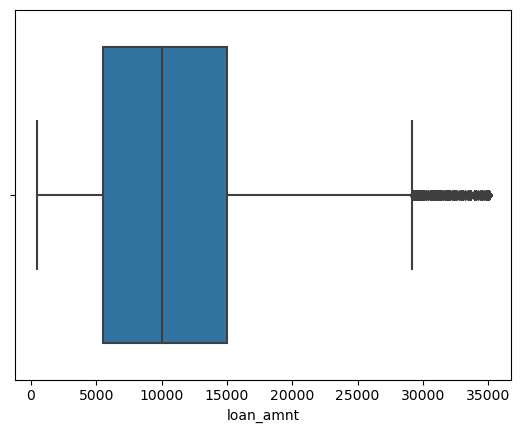

In [161]:
for i in num_cols:
    print("Boxplot of ", i)
    sns.boxplot(x=clean_loan_data[i])
    plt.show()

Boxplot of  int_rate_num


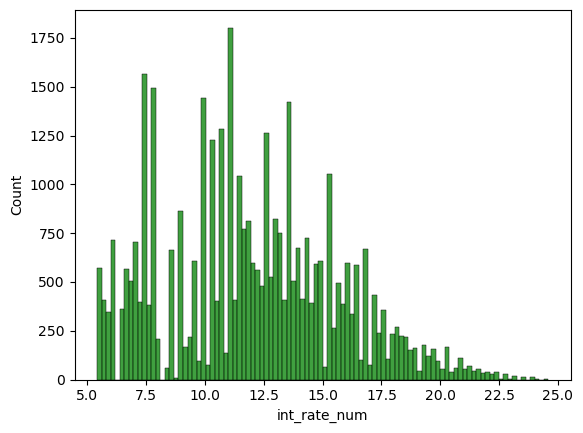

Boxplot of  annual_inc


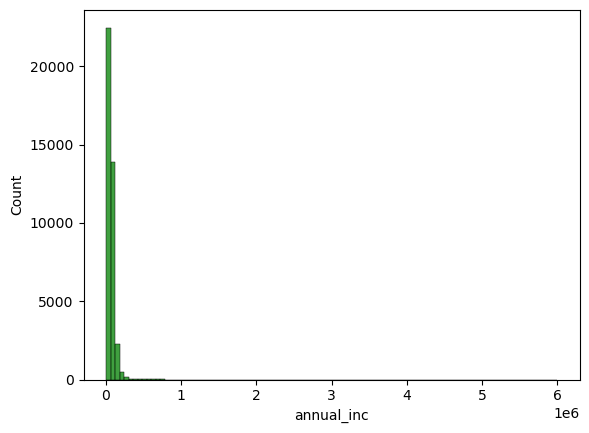

Boxplot of  funded_amnt


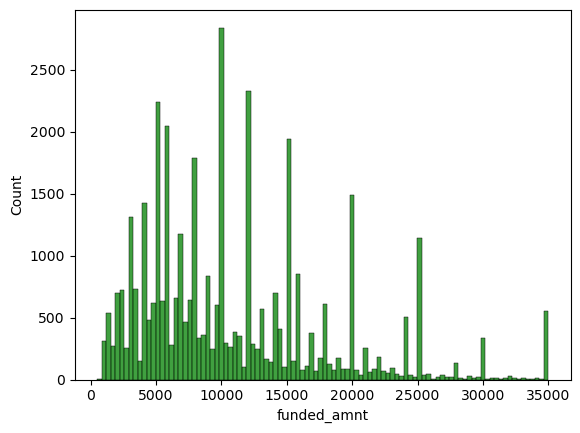

Boxplot of  installment


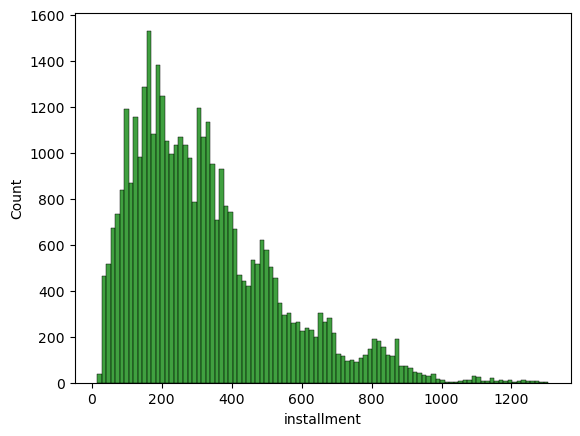

Boxplot of  loan_amnt


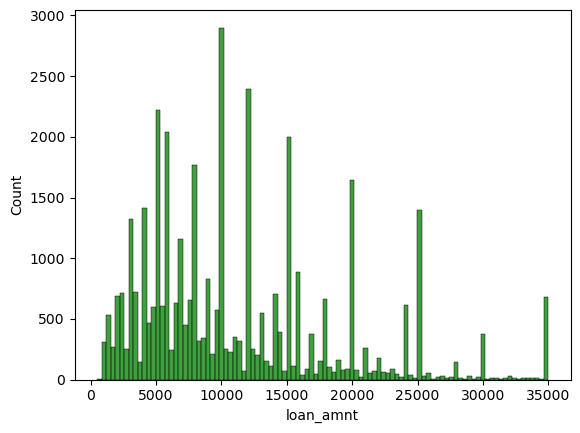

In [166]:

for i in num_cols:
    print("Boxplot of ",i)
    sns.histplot(x=clean_loan_data[i], bins=100, color='green')
    plt.show()

Boxplot of  loan_status


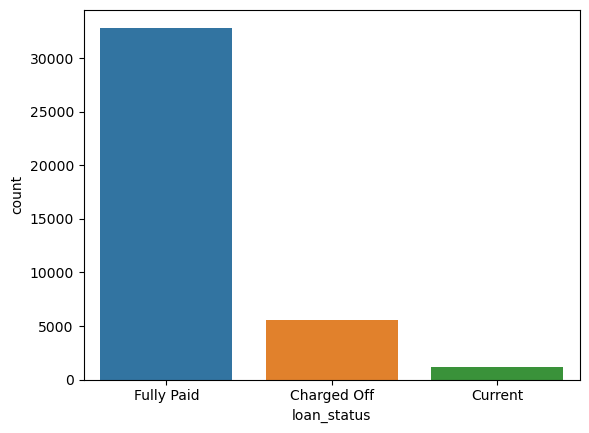

Boxplot of  term


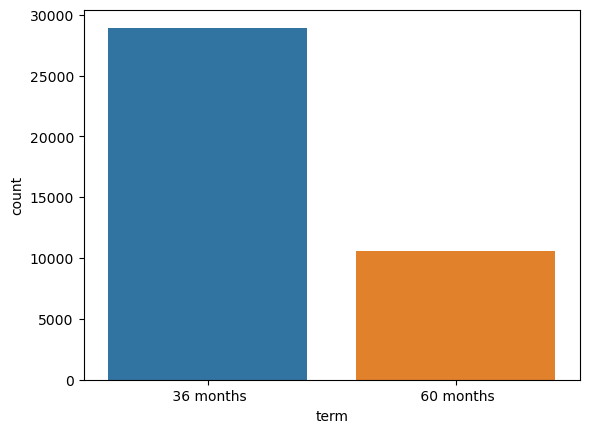

Boxplot of  grade


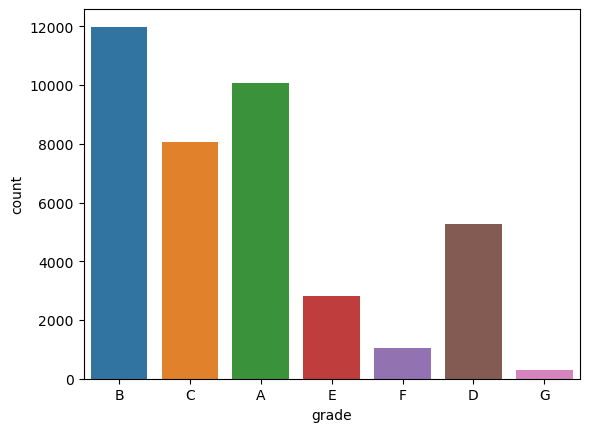

Boxplot of  home_ownership


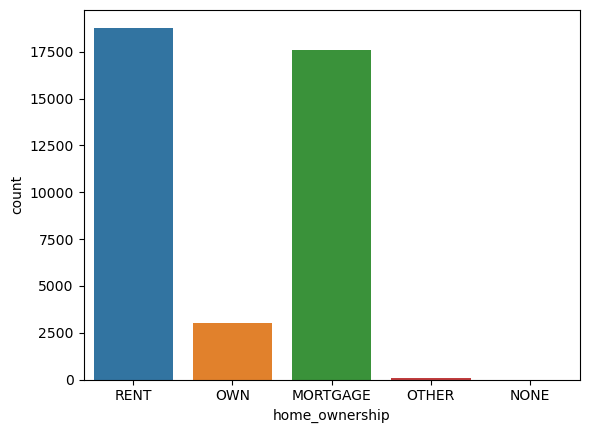

Boxplot of  verification_status


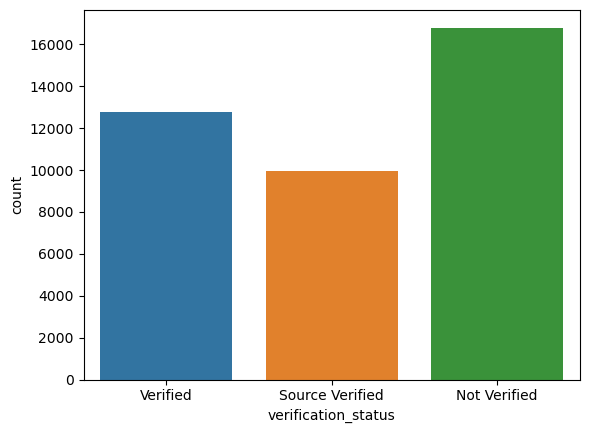

Boxplot of  purpose


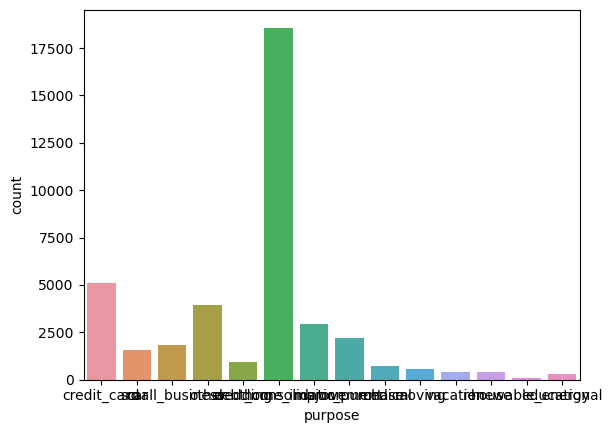

Boxplot of  addr_state


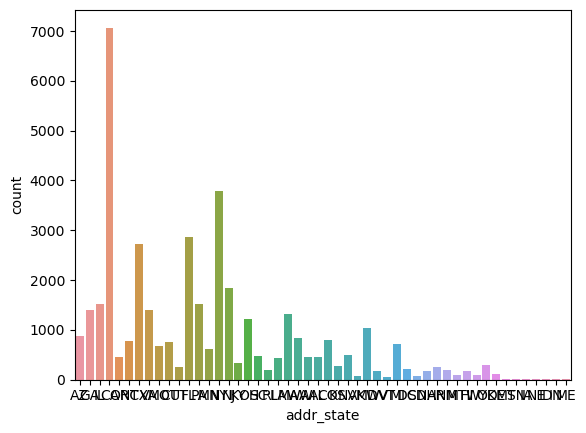

In [167]:
for i in categorical_cols:
    print("Boxplot of ",i)
    sns.countplot(x=clean_loan_data[i])
    plt.show()

<Axes: ylabel='count'>

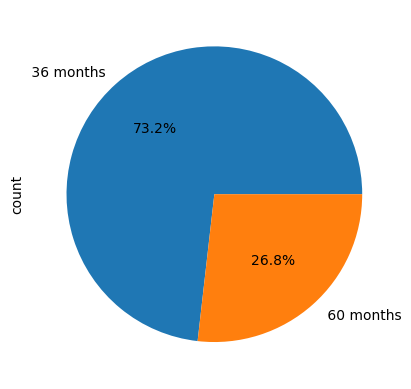

In [168]:
# Two tenures are there for customers 36 and 60 months
# Most people ~73% opted for short tenure (36 months) 
clean_loan_data['term'].value_counts().plot.pie(autopct='%.1f%%')

Text(0.5, 1.0, 'Customer experience chart')

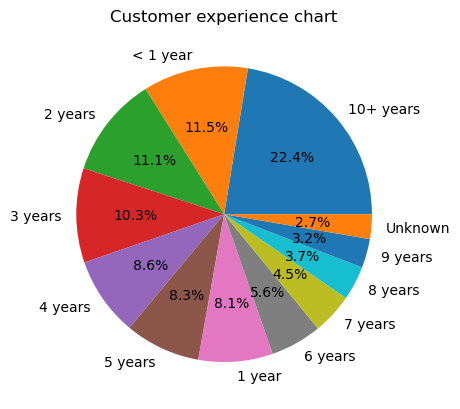

In [169]:
# more than 10+ years work experience people are borrowing loan
clean_loan_data['emp_length'].value_counts().plot.pie(autopct='%.1f%%')
plt.ylabel('')
plt.title('Customer experience chart')

### Bivariate Analysis

Bar plot of  loan_status  Vs  int_rate_num


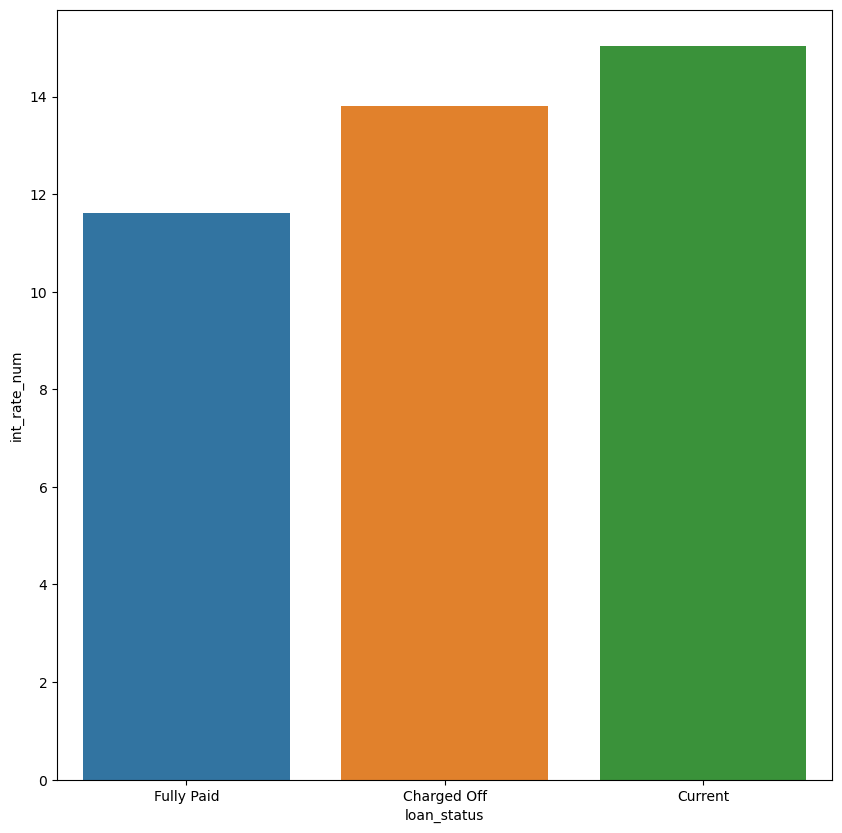

Bar plot of  loan_status  Vs  annual_inc


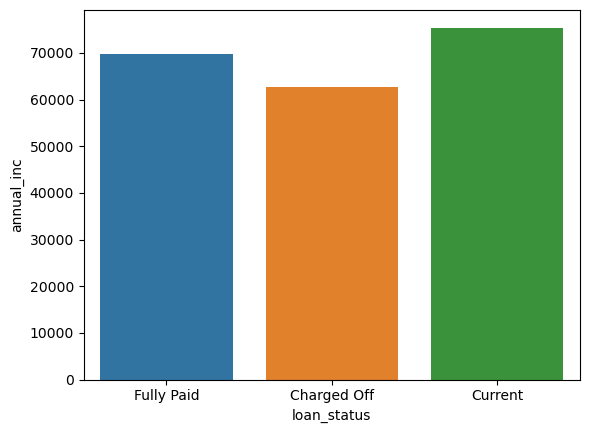

Bar plot of  loan_status  Vs  funded_amnt


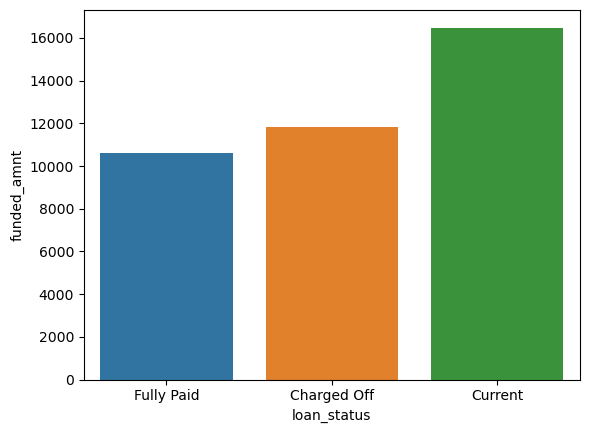

Bar plot of  loan_status  Vs  installment


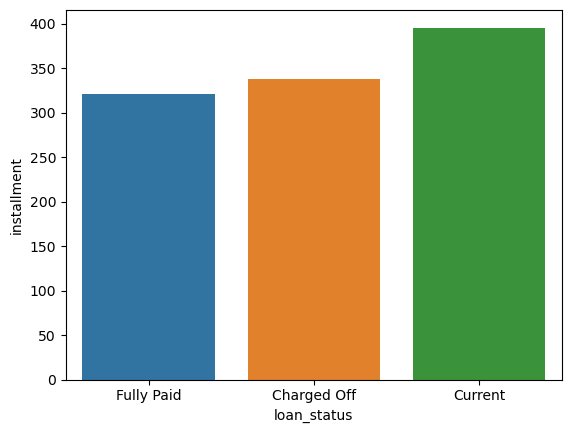

Bar plot of  loan_status  Vs  loan_amnt


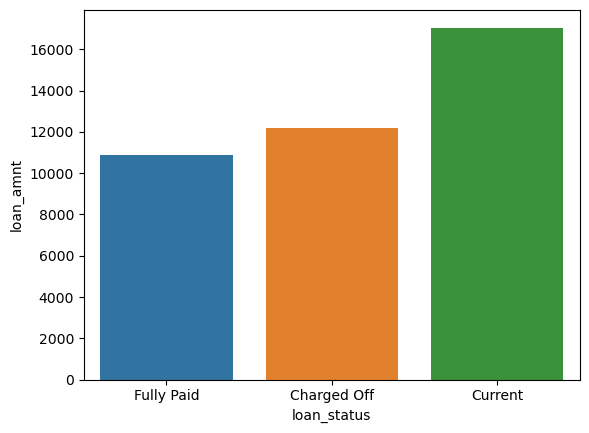

Bar plot of  term  Vs  int_rate_num


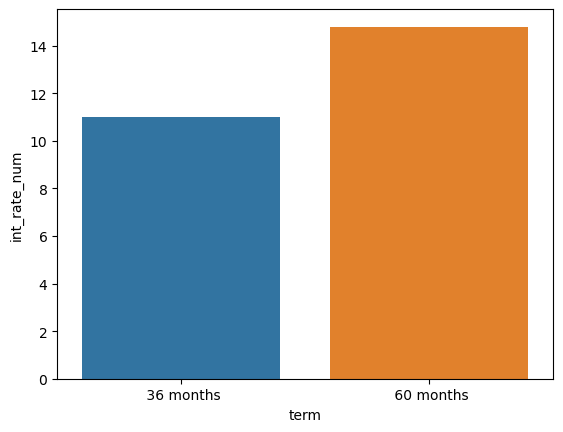

Bar plot of  term  Vs  annual_inc


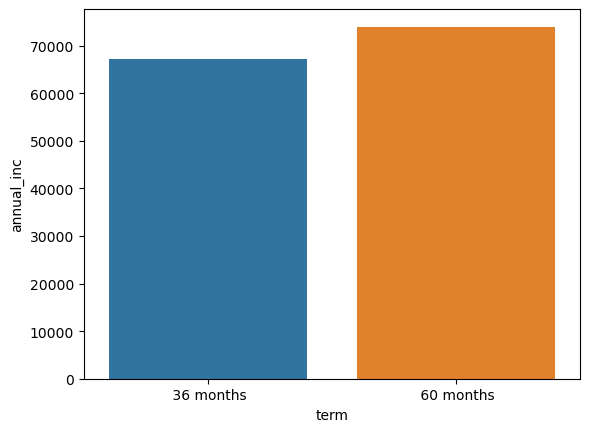

Bar plot of  term  Vs  funded_amnt


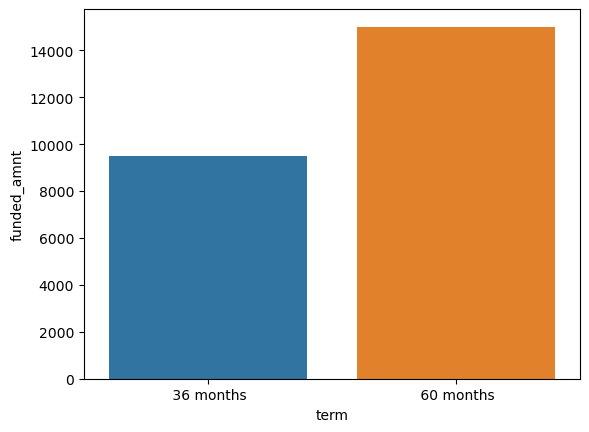

Bar plot of  term  Vs  installment


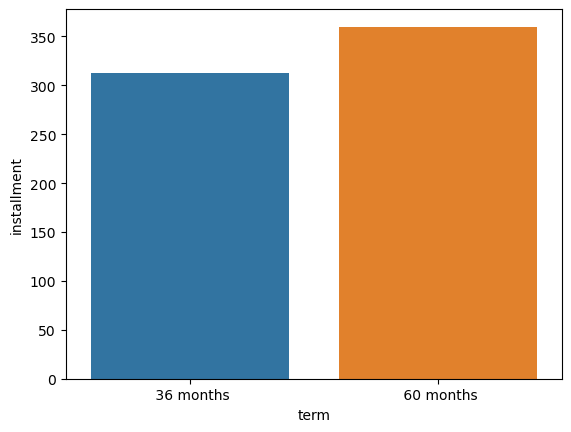

Bar plot of  term  Vs  loan_amnt


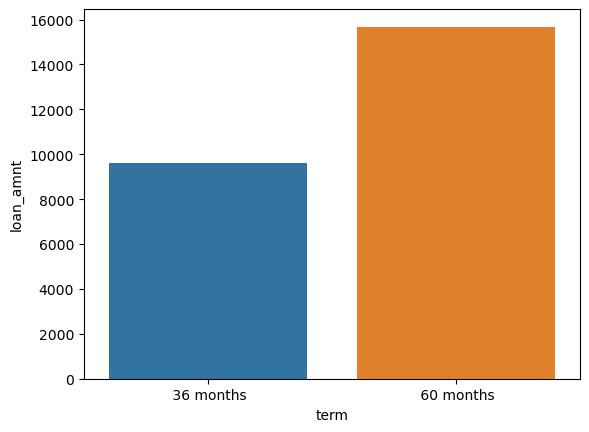

Bar plot of  grade  Vs  int_rate_num


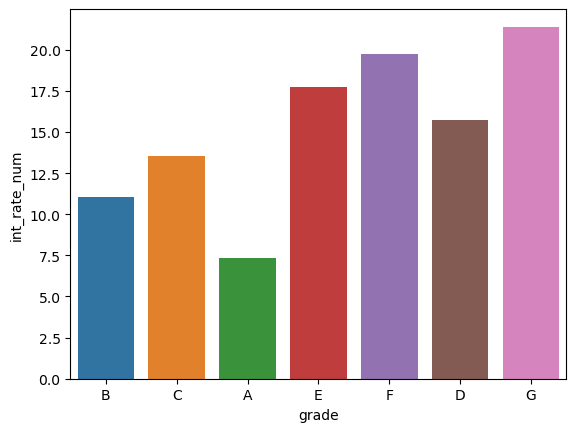

Bar plot of  grade  Vs  annual_inc


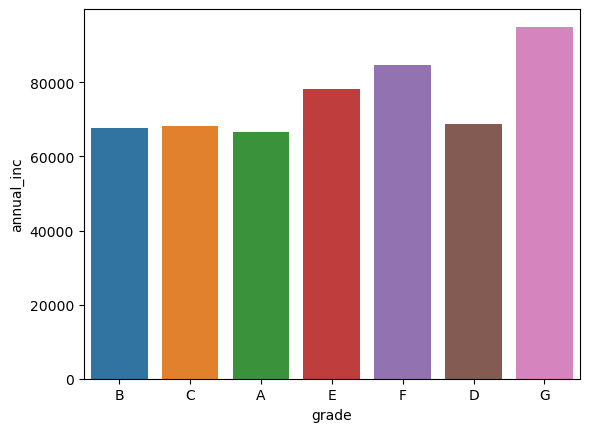

Bar plot of  grade  Vs  funded_amnt


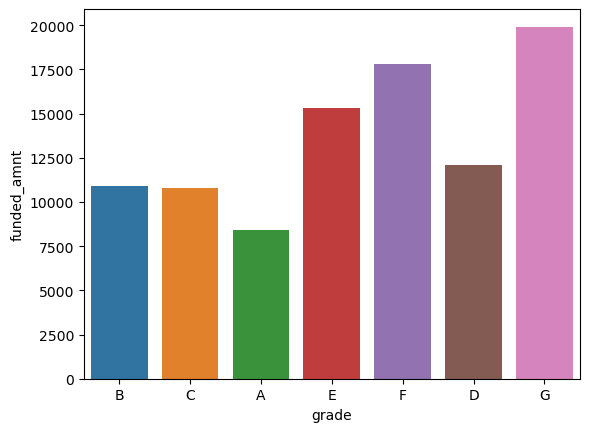

Bar plot of  grade  Vs  installment


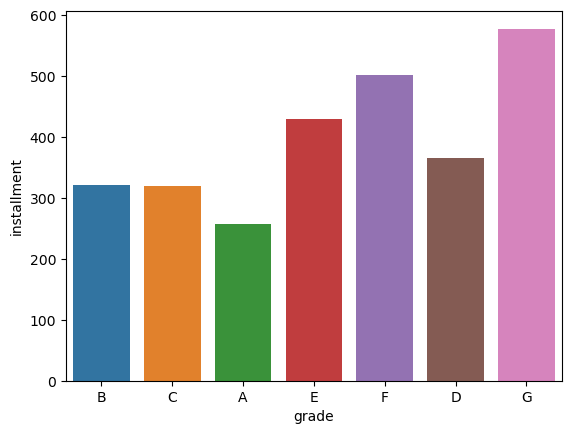

Bar plot of  grade  Vs  loan_amnt


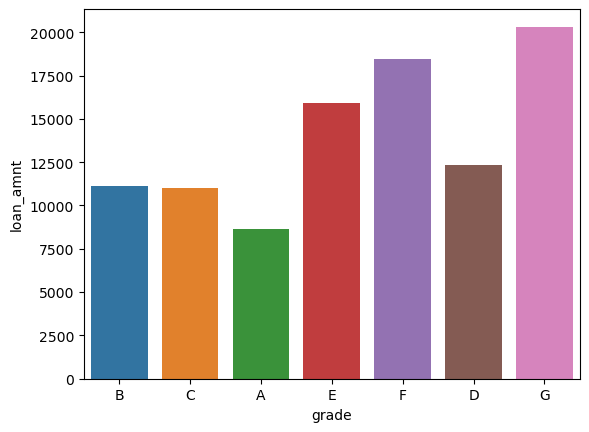

Bar plot of  home_ownership  Vs  int_rate_num


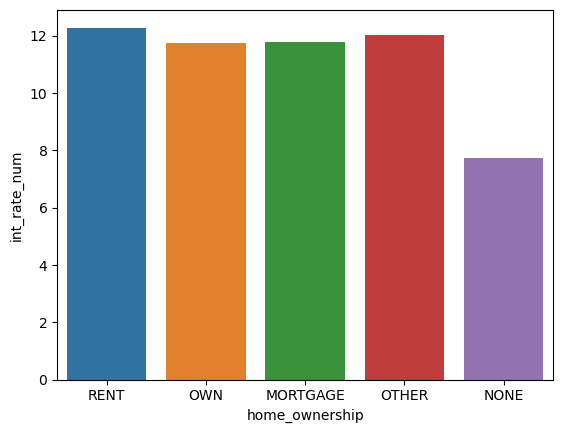

Bar plot of  home_ownership  Vs  annual_inc


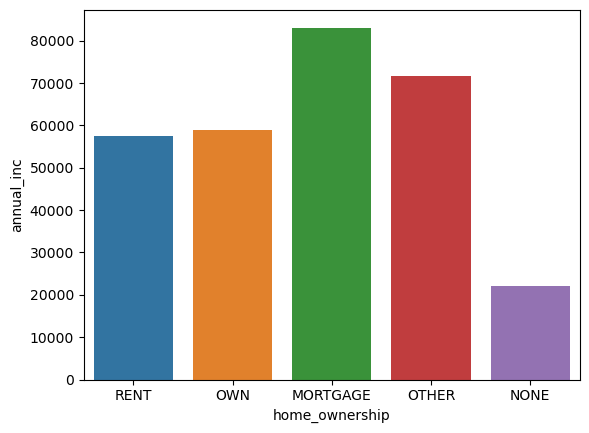

Bar plot of  home_ownership  Vs  funded_amnt


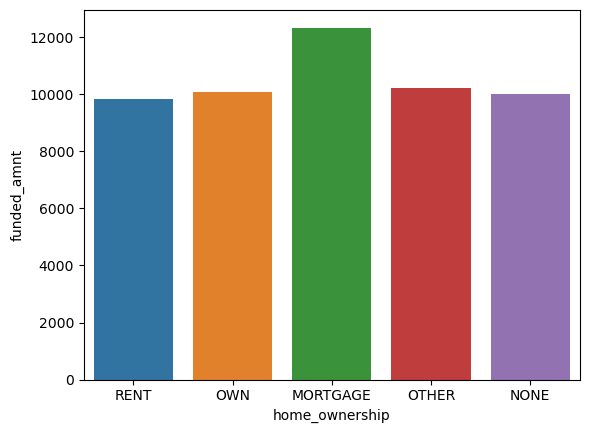

Bar plot of  home_ownership  Vs  installment


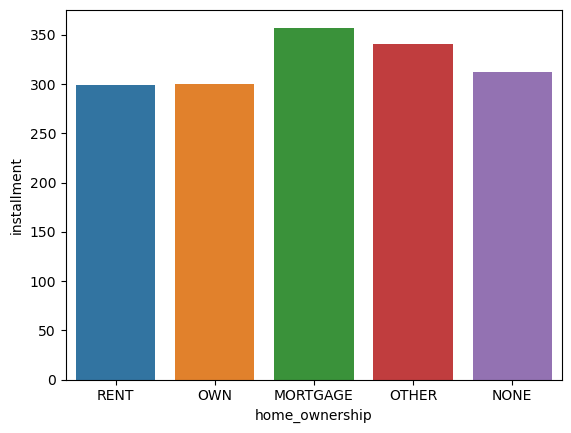

Bar plot of  home_ownership  Vs  loan_amnt


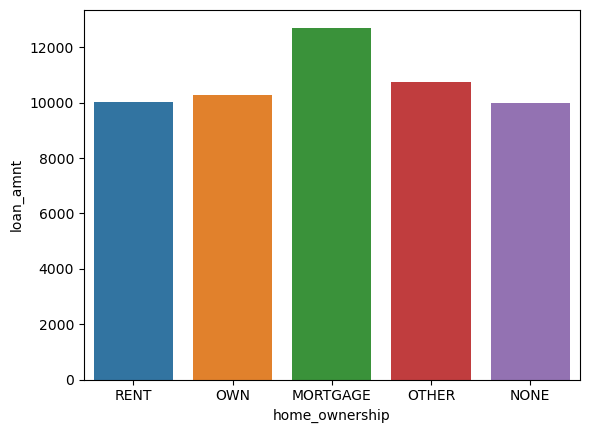

Bar plot of  verification_status  Vs  int_rate_num


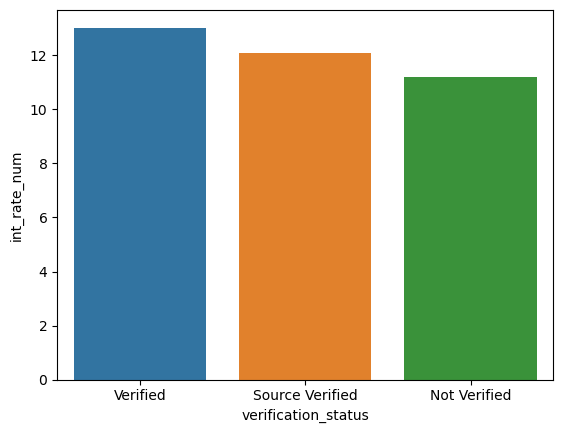

Bar plot of  verification_status  Vs  annual_inc


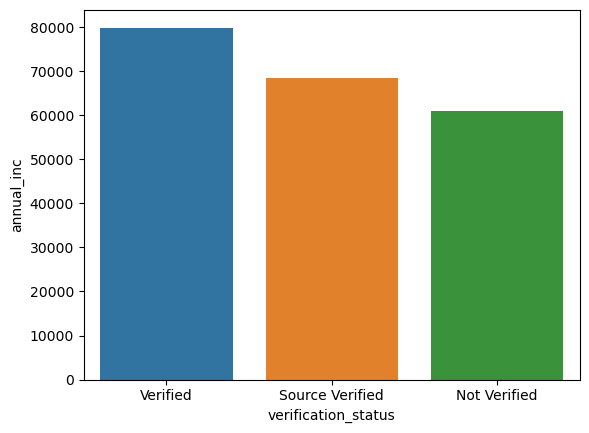

Bar plot of  verification_status  Vs  funded_amnt


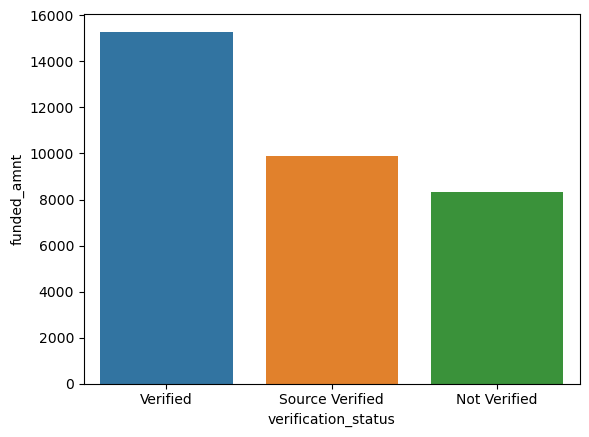

Bar plot of  verification_status  Vs  installment


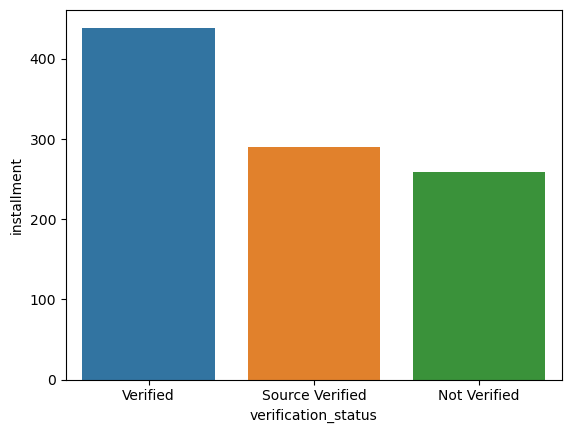

Bar plot of  verification_status  Vs  loan_amnt


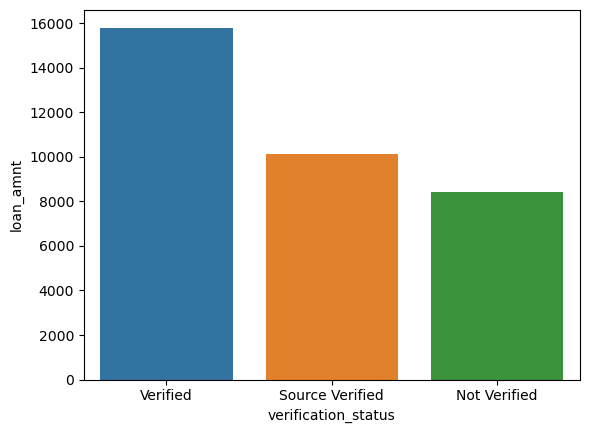

Bar plot of  purpose  Vs  int_rate_num


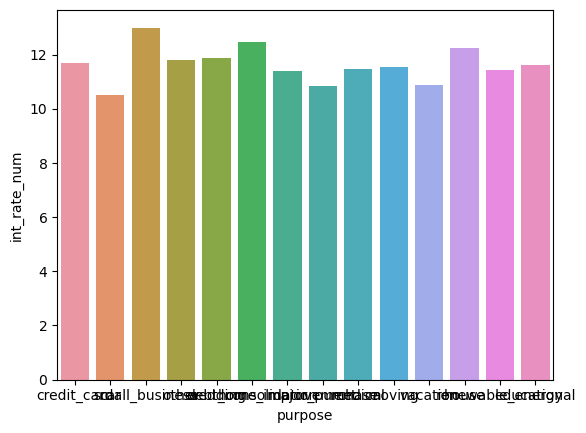

Bar plot of  purpose  Vs  annual_inc


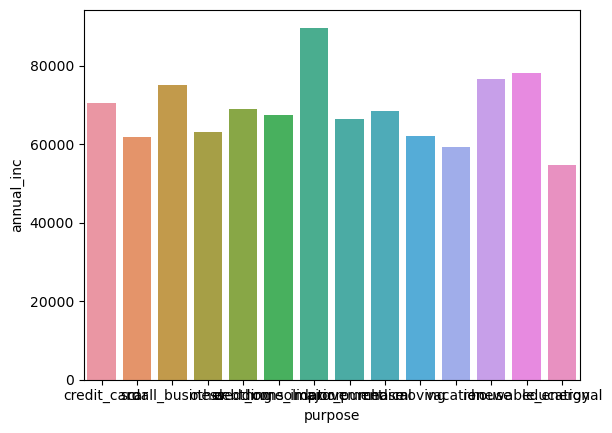

Bar plot of  purpose  Vs  funded_amnt


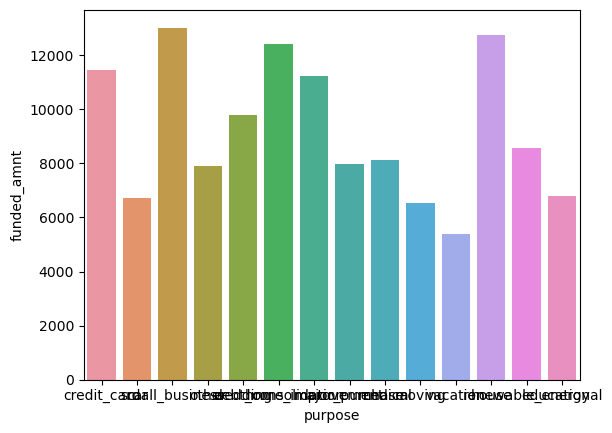

Bar plot of  purpose  Vs  installment


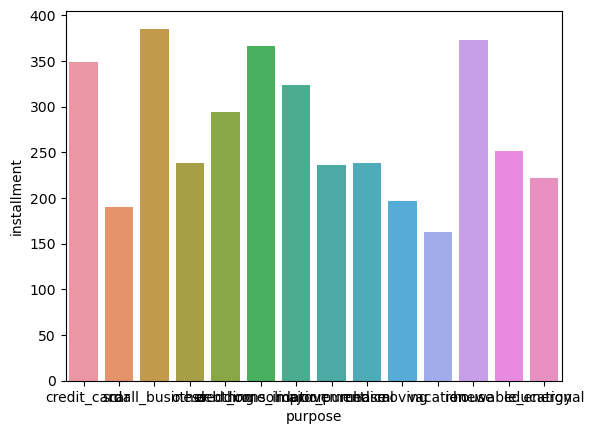

Bar plot of  purpose  Vs  loan_amnt


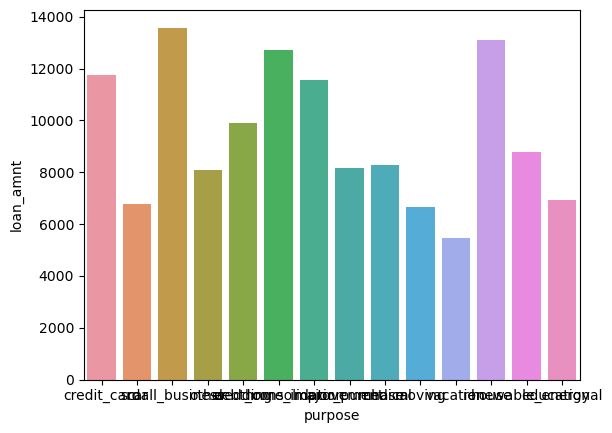

Bar plot of  addr_state  Vs  int_rate_num


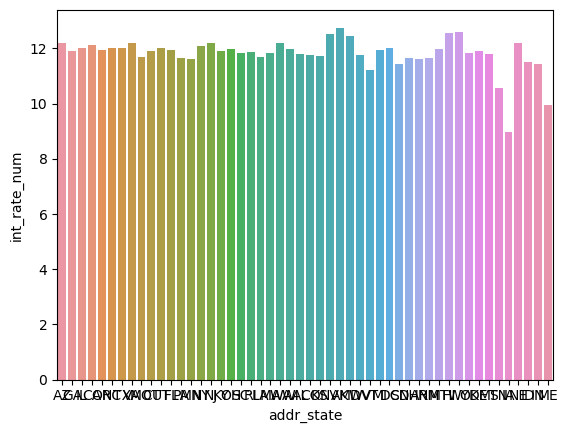

Bar plot of  addr_state  Vs  annual_inc


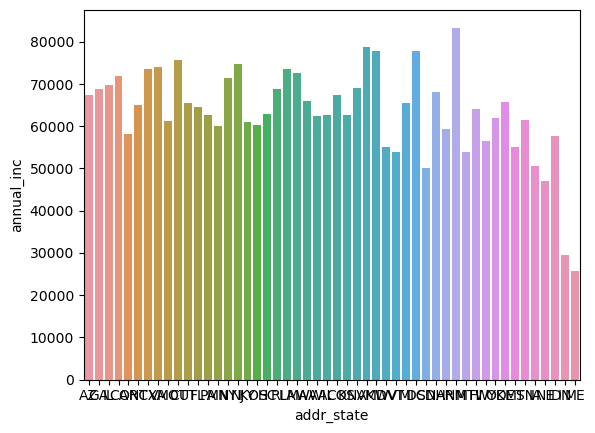

Bar plot of  addr_state  Vs  funded_amnt


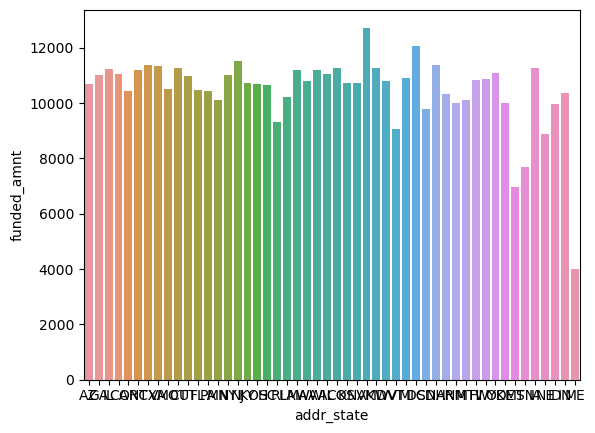

Bar plot of  addr_state  Vs  installment


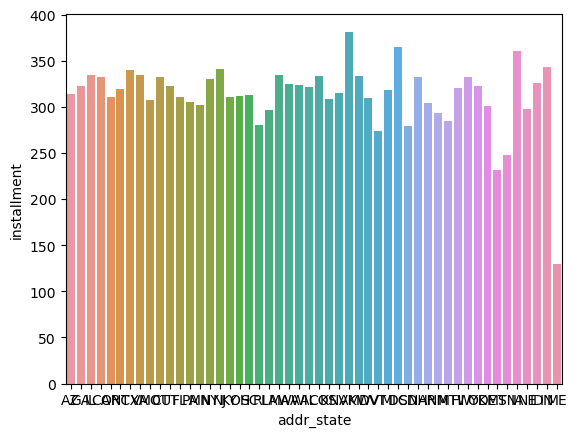

Bar plot of  addr_state  Vs  loan_amnt


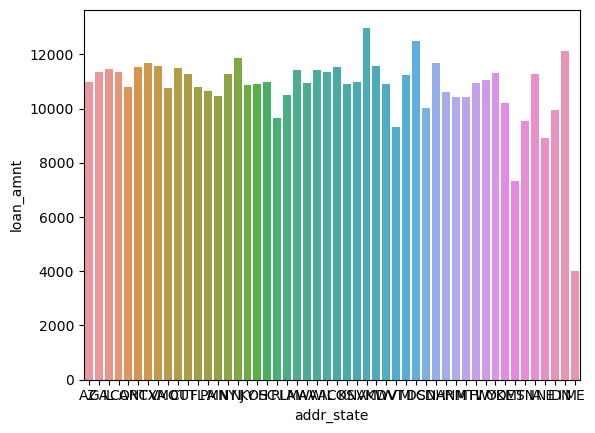

In [130]:
plt.figure(figsize=(10,10)) 

for col1 in categorical_cols:
    for col2 in num_cols:
        print("Bar plot of ",col1, " Vs ", col2)
        sns.barplot(x=clean_loan_data[col1], y=clean_loan_data[col2], ci=None)
        plt.show()

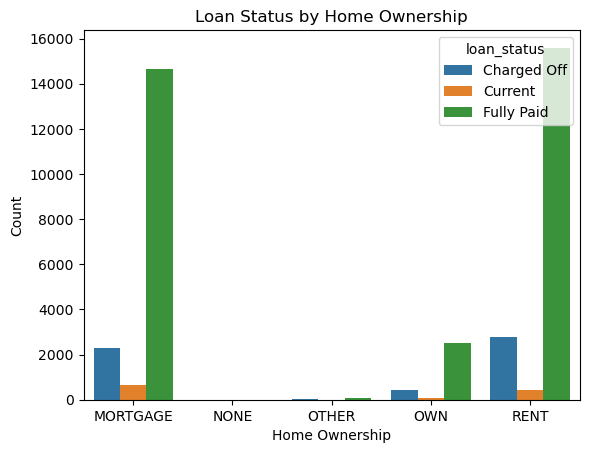

In [84]:
# Group by 'home_ownership' and 'loan_status' and calculate counts
grouped_data = clean_loan_data.groupby(['home_ownership', 'loan_status']).size().reset_index(name='count')

# Pivot the table for easy plotting
pivot_table = grouped_data.pivot_table(index='home_ownership', columns='loan_status', values='count', fill_value=0)


sns.barplot(data=grouped_data, x='home_ownership', y='count', hue='loan_status')

plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Loan Status by Home Ownership')

plt.show()

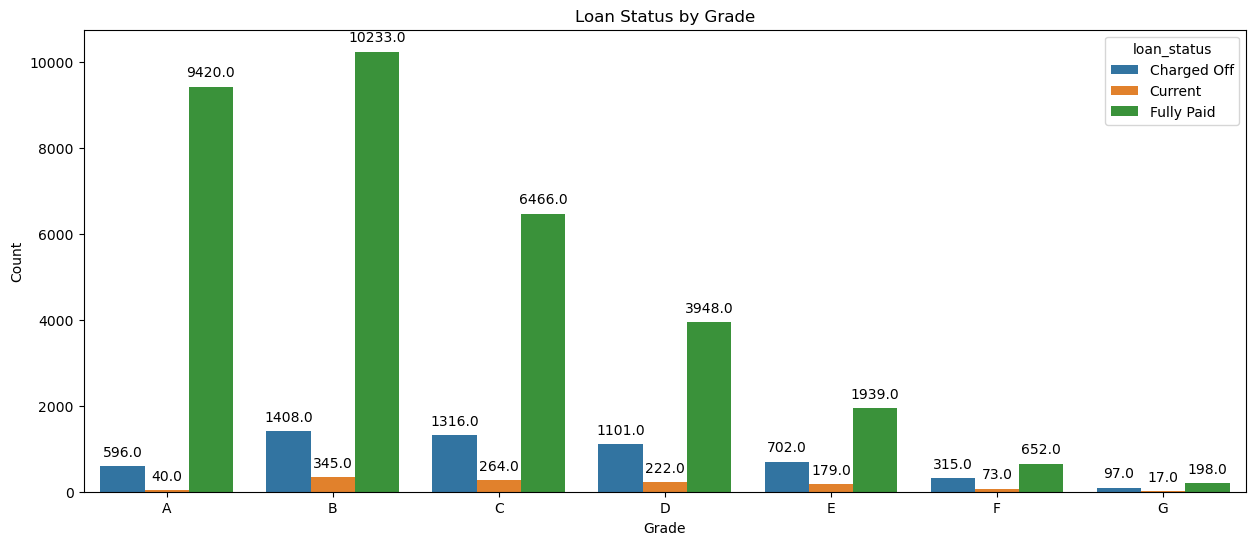

In [93]:
# Group by 'grade' and 'loan_status' and calculate counts
grade_grouped_data = clean_loan_data.groupby(['grade', 'loan_status']).size().reset_index(name='count')

# Pivot the table for easy plotting
pivot_table = grade_grouped_data.pivot_table(index='grade', columns='loan_status', values='count', fill_value=0)

plt.figure(figsize=(15, 6))
ax = sns.barplot(data=grade_grouped_data, x='grade', y='count', hue='loan_status')
# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Loan Status by Grade')

plt.show()